In [29]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [47]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime, timedelta
import matplotlib.dates as mdates


# Reflect Tables into SQLAlchemy ORM

In [1]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [2]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [3]:
# Declare a Base using `automap_base()`
Base = automap_base()

# Use the Base class to reflect the database tables
Base.prepare(autoload_with=engine)

In [4]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [5]:
# Assign the measurement class to a variable called `Measurement` and
Measurement = Base.classes.measurement
# assign the station class to a variable called `Station`
Station = Base.classes.station


In [6]:
# Create a session
session = Session(engine)


# Exploratory Precipitation Analysis

In [49]:
# Find the most recent date in the data set.
recent_date = (session.query(Measurement.date)
              .order_by(Measurement.date.desc())
              .first())
recent_date

('2017-08-23',)

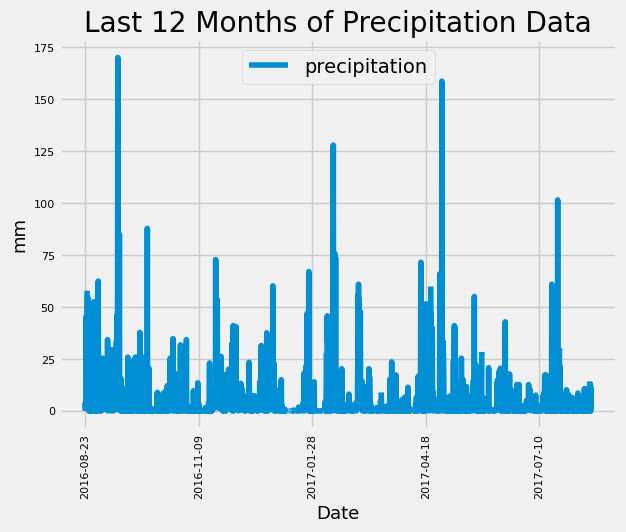

In [71]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.
one_year = dt.date(2017,8,23)-dt.timedelta(days=365)

# Convert string to datetime
#recent_date_point_str = "2017-08-23"  # Example date string
#recent_date_point = datetime.strptime(recent_date_point_str, "%Y-%m-%d")

# Calculate the date one year from the last date in data set.
one_year_ago = dt.date(one_year.year, one_year.month, one_year.day)

# Perform a query to retrieve the data and precipitation scores
results= session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year_ago).order_by(Measurement.date).all()                   

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_data = pd.DataFrame(results, columns=['date', 'precipitation'])
#precipitation_data['date'] = pd.to_datetime(precipitation_data['date'])

# Sort the dataframe by date
precipitation_data.set_index(precipitation_data ['date'], inplace=True)
#precipitation_data.sort_index(inplace=True)
precipitation_data.head()

# Reset the index of the DataFrame before plotting
#precipitation_data_reset = precipitation_data.reset_index()

#Use Pandas Plotting with Matplotlib to plot the data
precipitation_data.plot('date', 'precipitation')
plt.xticks(rotation=90, size = 8)
plt.xlabel('Date', size = 13)
plt.ylabel('mm', size = 13)
plt.title('Last 12 Months of Precipitation Data')
plt.yticks(size = 8)
plt.legend(["precipitation"], loc= 'upper center')
plt.show()


In [57]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_statistics = precipitation_data.describe()
summary_statistics

,precipitation
count,2021.000000
mean,4.505888
std,11.713487
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [62]:
# Design a query to calculate the total number of stations in the dataset
session.query(Station.id).count()

9

In [63]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station)\
.order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [64]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs))\
    .filter(Measurement.station=='USC00519281').all()

[(12.2, 29.4, 22.03582251082252)]

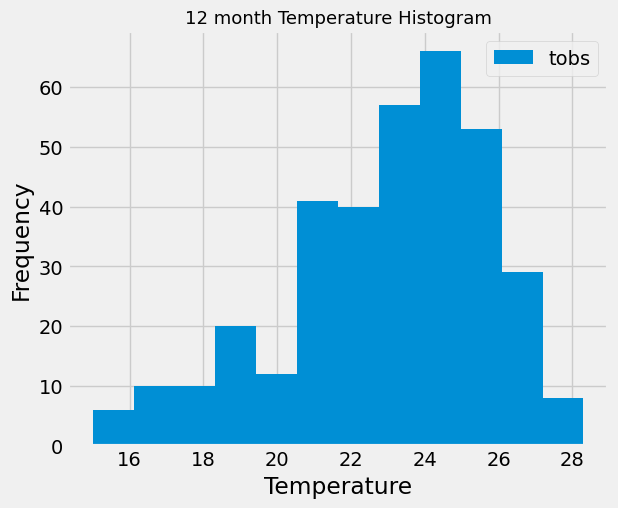

In [72]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results= session.query(Measurement.tobs).filter(Measurement.station=='USC00519281')\
.filter(Measurement.date>= one_year_ago).order_by(Measurement.date).all() 

#Plot results
high_station_temp=pd.DataFrame(results,columns=['tobs'])
high_station_temp.plot.hist(bins=12)
plt.tight_layout()
plt.title("12 month Temperature Histogram", size=13)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend(["tobs"], loc= 'upper right')
plt.show()

# Close Session

In [73]:
# Close Session
session.close()
